In [53]:
def parse_csv(path, separator):
    data = {}
    with open(path, "r") as f:
        _ = f.readline()
        while True:
            line = f.readline().strip("\n")
            if not line:
                break        
            date, spot_price = line.split(separator, 1)
            data[date] = np.array(list(map(lambda x: float(x), spot_price.split(";"))))
    return data

import numpy as np
system_1_hourly_production_per_kWp = np.load("norm_15_7kWp_system_power_production.npy")
system_2_hourly_production_per_kWp = np.load("norm_12kWp_system_power_production.npy")
power_spot_price_SEK_per_MkWh = parse_csv("elspotprices_sek.csv", ";")

In [107]:
import datetime
def compute_earnings_over_month(
    year:int , month: int, power_production_model_kWh, spot_prices_MkWh, 
    peak_power_production:float
):
    assert power_production_model_kWh.shape == (24,), \
        "You should pass in the hourly power production for the day in the given month"
    current_date = datetime.datetime(year, month, 1)
    day = datetime.timedelta(days=1)

    earnings_month_kronor = 0
    power_production_month_kWh = 0
    num_days_in_month = calendar.monthrange(year, month)[1]
    for _ in range(num_days_in_month):
        current_date_key = datetime.datetime.strftime(current_date, "%Y-%m-%d")
        spot_price_day_MkWh = spot_prices_MkWh[current_date_key]
        spot_price_day_kWh = spot_price_day_MkWh / 1000.0

        hourly_earnings_kronor = spot_price_day_kWh * power_production_model_kWh * peak_power_production
        
        earnings_day = hourly_earnings_kronor.sum()
        power_production_day = power_production_model_kWh.sum()
        
        earnings_month_kronor += earnings_day
        power_production_month_kWh += power_production_day
        current_date += day
    
    return earnings_month_kronor, power_production_month_kWh

def compute_earnings_over_year(year:int, power_production_model_kWh, spot_prices_MkWh, 
    peak_power_production:float
):
    monthly_earnings = []
    monthly_productions = []
    for month in range(1,13):
        earnings, power_production = compute_earnings_over_month( \
            year, month, power_production_model_kWh[:,month -1], power_spot_price_SEK_per_MkWh, \
            peak_power_production_of_system)
        monthly_earnings.append(earnings)
        monthly_productions.append(power_production)
    return np.array(monthly_earnings), np.array(monthly_productions)

def system_1_over_year(year, system_size):
    peak_power_production_of_system = 12
    return compute_earnings_over_year( \
        year, system_1_hourly_production_per_kWp, power_spot_price_SEK_per_MkWh, \
        peak_power_production_of_system)

def system_2_over_year(year, system_size):
    peak_power_production_of_system = 12
    return compute_earnings_over_year( \
        year, system_2_hourly_production_per_kWp, power_spot_price_SEK_per_MkWh, \
        peak_power_production_of_system)

system_peak_prod_kWh = 12
system_1_earnings_2016, system_1_production_2016 = system_1_over_year(2016, system_peak_prod_kWh)
system_1_earnings_2017, system_1_production_2017 = system_1_over_year(2017, system_peak_prod_kWh)
system_1_earnings_2018, system_1_production_2018 = system_1_over_year(2018, system_peak_prod_kWh)
system_1_earnings_2019, system_1_production_2019 = system_1_over_year(2019, system_peak_prod_kWh)
system_1_earnings_2020, system_1_production_2020 = system_1_over_year(2020, system_peak_prod_kWh)
system_1_earnings_2021, system_1_production_2021 = system_1_over_year(2021, system_peak_prod_kWh)
system_1_earnings_2022, system_1_production_2022 = system_1_over_year(2022, system_peak_prod_kWh)
system_1_earnings_2023, system_1_production_2023 = system_1_over_year(2023, system_peak_prod_kWh)

system_2_earnings_2016, system_2_production_2016 = system_2_over_year(2016, system_peak_prod_kWh)
system_2_earnings_2017, system_2_production_2017 = system_2_over_year(2017, system_peak_prod_kWh)
system_2_earnings_2018, system_2_production_2018 = system_2_over_year(2018, system_peak_prod_kWh)
system_2_earnings_2019, system_2_production_2019 = system_2_over_year(2019, system_peak_prod_kWh)
system_2_earnings_2020, system_2_production_2020 = system_2_over_year(2020, system_peak_prod_kWh)
system_2_earnings_2021, system_2_production_2021 = system_2_over_year(2021, system_peak_prod_kWh)
system_2_earnings_2022, system_2_production_2022 = system_2_over_year(2022, system_peak_prod_kWh)
system_2_earnings_2023, system_2_production_2023 = system_2_over_year(2023, system_peak_prod_kWh)

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "SUM"]
years = list(range(2016, 2024))

column_width = 6
header = "Year  " + "  ".join(f"{month:>{column_width}}" for month in months)
table_width = len(header)
print("System 1 Earnings (SEK)\n".center(table_width))
print(header)
print("-" * len(header))
print(f"{'2016:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_1_earnings_2016), f"  {system_1_earnings_2016.sum():.1f}")
print(f"{'2017:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_1_earnings_2017), f"  {system_1_earnings_2017.sum():.1f}")
print(f"{'2018:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_1_earnings_2018), f"  {system_1_earnings_2018.sum():.1f}")
print(f"{'2019:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_1_earnings_2019), f"  {system_1_earnings_2019.sum():.1f}")
print(f"{'2020:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_1_earnings_2020), f"  {system_1_earnings_2020.sum():.1f}")
print(f"{'2021:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_1_earnings_2021), f"  {system_1_earnings_2021.sum():.1f}")
print(f"{'2022:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_1_earnings_2022), f"  {system_1_earnings_2022.sum():.1f}")
print(f"{'2023:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_1_earnings_2023), f"  {system_1_earnings_2023.sum():.1f}")

print("")

header = "Year  " + "  ".join(f"{month:>{column_width}}" for month in months)
table_width = len(header)
print("System 1 Production (kWh)\n".center(table_width))
print(header)
print("-" * len(header))
print(f"{'2016:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_1_production_2016), f"  {system_1_production_2016.sum():.1f}")
print(f"{'2017:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_1_production_2017), f"  {system_1_production_2017.sum():.1f}")
print(f"{'2018:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_1_production_2018), f"  {system_1_production_2018.sum():.1f}")
print(f"{'2019:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_1_production_2019), f"  {system_1_production_2019.sum():.1f}")
print(f"{'2020:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_1_production_2020), f"  {system_1_production_2020.sum():.1f}")
print(f"{'2021:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_1_production_2021), f"  {system_1_production_2021.sum():.1f}")
print(f"{'2022:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_1_production_2022), f"  {system_1_production_2022.sum():.1f}")
print(f"{'2023:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_1_production_2023), f"  {system_1_production_2023.sum():.1f}")


print("")

print("System 2 Earnings (SEK)\n".center(table_width))
print(header)
print("-" * len(header))
print(f"{'2016:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_2_earnings_2016), f"  {system_2_earnings_2016.sum():.1f}")
print(f"{'2017:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_2_earnings_2017), f"  {system_2_earnings_2017.sum():.1f}")
print(f"{'2018:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_2_earnings_2018), f"  {system_2_earnings_2018.sum():.1f}")
print(f"{'2019:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_2_earnings_2019), f"  {system_2_earnings_2019.sum():.1f}")
print(f"{'2020:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_2_earnings_2020), f"  {system_2_earnings_2020.sum():.1f}")
print(f"{'2021:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_2_earnings_2021), f"  {system_2_earnings_2021.sum():.1f}")
print(f"{'2022:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_2_earnings_2022), f"  {system_2_earnings_2022.sum():.1f}")
print(f"{'2023:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_2_earnings_2023), f"  {system_2_earnings_2023.sum():.1f}")

print("")

header = "Year  " + "  ".join(f"{month:>{column_width}}" for month in months)
table_width = len(header)
print("System 2 Production (kWh)\n".center(table_width))
print(header)
print("-" * len(header))
print(f"{'2016:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_2_production_2016), f"  {system_2_production_2016.sum():.1f}")
print(f"{'2017:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_2_production_2017), f"  {system_2_production_2017.sum():.1f}")
print(f"{'2018:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_2_production_2018), f"  {system_2_production_2018.sum():.1f}")
print(f"{'2019:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_2_production_2019), f"  {system_2_production_2019.sum():.1f}")
print(f"{'2020:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_2_production_2020), f"  {system_2_production_2020.sum():.1f}")
print(f"{'2021:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_2_production_2021), f"  {system_2_production_2021.sum():.1f}")
print(f"{'2022:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_2_production_2022), f"  {system_2_production_2022.sum():.1f}")
print(f"{'2023:':<5}", "  ".join(f"{v:>{column_width}.1f}" for v in system_2_production_2023), f"  {system_2_production_2023.sum():.1f}")


                                          System 1 Earnings (SEK)
                                          
Year     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep     Oct     Nov     Dec     SUM
------------------------------------------------------------------------------------------------------------
2016:  189.5   169.7   270.1   340.1   479.2   873.6   594.4   541.5   489.0   356.7   237.2    64.3   4605.3
2017:  180.0   280.7   397.6   467.8   623.7   667.4   640.6   600.8   620.2   299.4   181.2    61.3   5020.8
2018:  193.2   353.9   636.7   673.5   770.9  1115.0  1143.8  1009.8   901.6   453.1   294.8   103.5   7649.8
2019:  336.4   414.0   554.3   708.3   819.2   706.7   772.9   694.2   635.3   404.1   254.9    76.8   6377.1
2020:  149.5   195.6   219.0   179.2   314.5   782.3   226.5   740.1   649.5   262.5   170.5    75.9   3965.1
2021:  315.3   509.6   537.4   587.8   965.1  1066.2  1319.2  1263.2  1757.3   788.1   587.2   426.6   10123.0
2022:  723.8

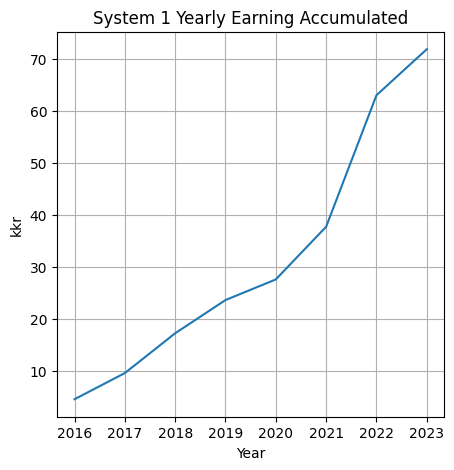

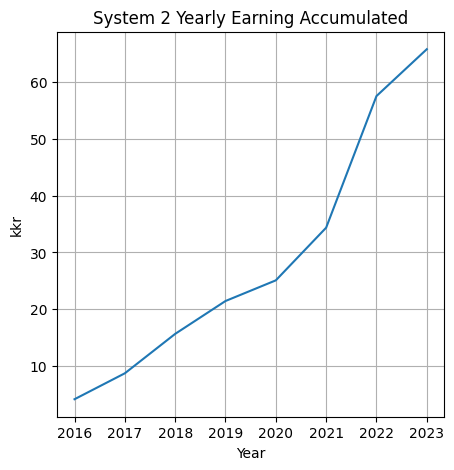

In [120]:
def plot_cum_sum(yearly_earnings, title):
    import matplotlib.pyplot as plt
    x = np.arange(2016, 2024)
    y = np.array(yearly_earnings).cumsum()
    y /= 1000
    
    fig = plt.figure(figsize=(5,5))
    
    plt.plot(x,y)
    plt.title(title)
    plt.grid()
    plt.xlabel("Year")
    plt.ylabel("kkr")
    plt.show()
  

system_1_yearly_earnings = [
    system_1_earnings_2016.sum(),
    system_1_earnings_2017.sum(),
    system_1_earnings_2018.sum(),
    system_1_earnings_2019.sum(),
    system_1_earnings_2020.sum(),
    system_1_earnings_2021.sum(),
    system_1_earnings_2022.sum(),
    system_1_earnings_2023.sum(),
]

system_2_yearly_earnings = [
    system_2_earnings_2016.sum(),
    system_2_earnings_2017.sum(),
    system_2_earnings_2018.sum(),
    system_2_earnings_2019.sum(),
    system_2_earnings_2020.sum(),
    system_2_earnings_2021.sum(),
    system_2_earnings_2022.sum(),
    system_2_earnings_2023.sum(),
]


plot_cum_sum(system_1_yearly_earnings, "System 1 Yearly Earning Accumulated")
plot_cum_sum(system_2_yearly_earnings, "System 2 Yearly Earning Accumulated")